In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,learning_curve, RandomizedSearchCV


In [399]:
df = pd.read_csv("brief_assurance.csv")

In [400]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [401]:
feature = df.columns[0:-1]
target = 'charges'
X =df.drop(["charges"],axis=1)
y = df[target]



In [402]:
numerical_features = [
       'age','bmi'
       ]
categorical_features = [
       'sex' , 'smoker', 'region','children'
       ]



In [403]:


my_col_trans = ColumnTransformer([
    ("sclal",StandardScaler(),numerical_features),
    ("pol",PolynomialFeatures(),numerical_features),
    ("one_hot_encoder",OneHotEncoder(),categorical_features)
])



In [404]:


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.8)



In [405]:
modelLasso= make_pipeline(my_col_trans, Lasso(alpha=50,random_state=0))
modelLasso.fit(X_train,y_train)
modelLasso.score(X_train,y_train)


0.7419080981181619

In [406]:
modelLasso.score(X_test,y_test)

0.7979588774513847

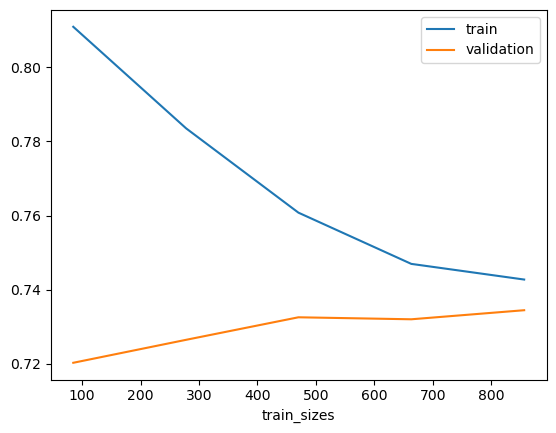

In [407]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(modelLasso,X_train,y_train,cv=5,return_times=True)
                                           
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

In [408]:
y_pred = modelLasso.predict(X_train)

In [409]:
residual = (y_pred - y_train).abs().sort_values()

In [410]:
residual.describe()

count     1070.000000
mean      4308.533444
std       4295.978358
min          6.008516
25%       1419.573236
50%       2906.091091
75%       6339.544661
max      30561.488362
Name: charges, dtype: float64

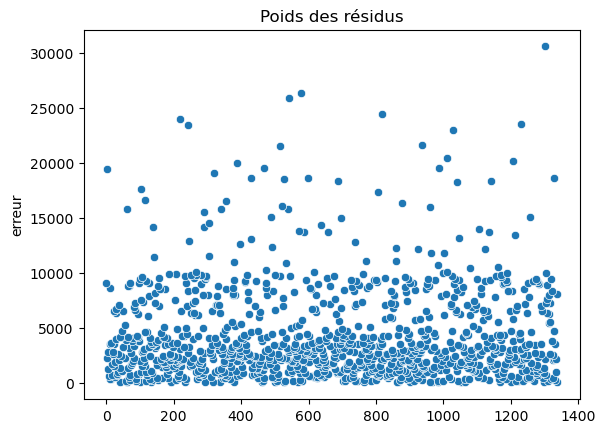

In [411]:


sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()



In [412]:


residual.quantile(0.98)



18351.0211250818

In [413]:
to_drop = residual[residual > residual.quantile(0.98)].index

In [414]:


X_train = X_train.drop(to_drop)
y_train = y_train.drop(to_drop)



In [415]:


modelLasso.fit(X_train,y_train)
modelLasso.score(X_train,y_train)



0.7907564051057618

In [416]:


modelLasso.score(X_test,y_test)



0.7944628984359166

In [417]:
y_pred = modelLasso.predict(X_train)

In [418]:
residual = (y_pred - y_train).abs().sort_values()

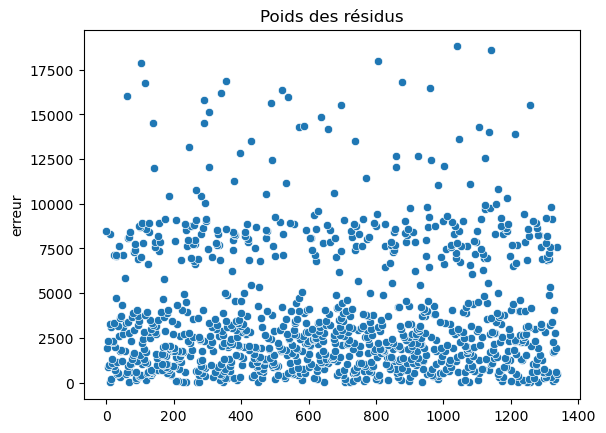

In [419]:
sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

4956.581494196006

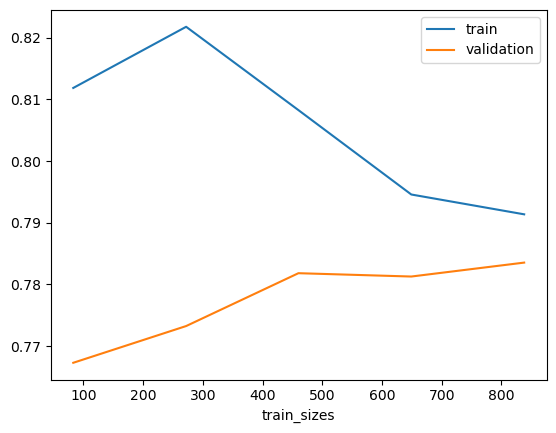

In [420]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(modelLasso,X_train,y_train,cv=5,return_times=True)
                                           
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()